# PCA: finding out which features are the most important

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

## Part 1: Importing the data

In [2]:
df_inner = pd.read_csv("../data_clean/cancer_industry.csv", low_memory=False)

In [3]:
df_inner.head()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,county,name,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000066,0.0,3.210888,0.000000,3.767853e-07,0.012181,0.275217,20.041190,654.873075,136.234634
1,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.047113,0.0,23.518978,435169.166702,1.886537e-03,0.000006,293448.484963,2400.143851,11995.153334,7473.552102
4,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


## Part 2: analysis

Names of environemental factors: ['Acid Rain', 'Energy', 'Freshwater Aquatic Ecotoxicity', 'Eutrophication', 'Food Waste', 'Global Climate Change', 'Hazardous Air Pollutants', 'Hazardous Waste', 'Human Health Cancer', 'Human Health Noncancer', 'Human Health - Respiratory Effects', 'Human Health Cancer and Noncancer', 'Employment', 'Land', 'Metals', 'Minerals and Metals', 'Muncipal Solid Waste', 'Nonrenewable Energy', 'Ozone Depletion', 'Pesticides', 'Renewable Energy', 'Smog Formation', 'Value Added', 'Water']

In [4]:
df_inner.columns

Index(['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description', 'county', 'name', 'industry_code',
       'industry_detail', 'relevant_naics', 'payann', 'estab', 'emp', 'ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [5]:
df_inner.head()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,county,name,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000066,0.0,3.210888,0.000000,3.767853e-07,0.012181,0.275217,20.041190,654.873075,136.234634
1,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.047113,0.0,23.518978,435169.166702,1.886537e-03,0.000006,293448.484963,2400.143851,11995.153334,7473.552102
4,Autauga County(6),1001,4,county,3,1,alabama,Oral Cavity & Pharynx,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df_inner['stateFIPS'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 22,
       23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

### Let's use PCA on the data_set

"Principal component analysis is a technique used to reduce the dimensionality of a data set. PCA is typically employed prior to implementing a machine learning algorithm because it minimizes the number of variables used to explain the maximum amount of variance for a given data set."

In [7]:
df_factors = df_inner[['ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
df_factors=df_factors.rename(columns={'annual_count_avg': "cancer"})

In [8]:
# TODO: Replace 3 or fewer value by 0
df_factors.replace(to_replace='3 or fewer', value='0', inplace=True)
df_factors['cancer'] = df_factors['cancer'].astype("float64").astype("int64")
#df_factors['cancer'].unique()

#### Covariance matrices

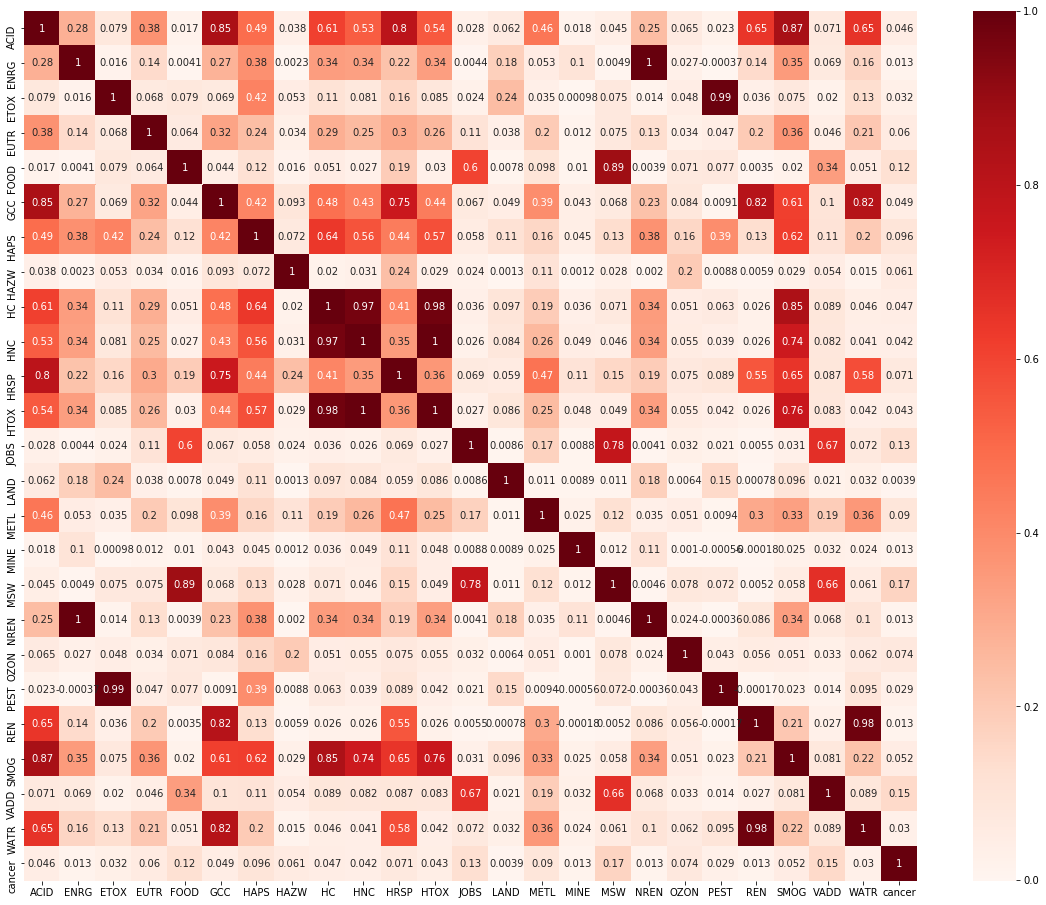

In [9]:
X = df_factors.iloc[:,0:24]  #independent columns
y = df_factors.iloc[:,-1]    #target column i.e cancer_rates
#get correlations of each features in dataset
corrmat = df_factors.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))
#plot heat map
g=sns.heatmap(df_factors[top_corr_features].corr(),annot=True,cmap='Reds')
# doesn't show cancer column because it has vaules that are strings

#### PCA model

##### Testing out without any scaling, with zero-mean scaling, and with zero-mean and std scaling
How to know wheter or not to standardize:
"If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation." ==> Given that I don't think this is the case we shouldn't standardize the data.

In [10]:
# Without scaling
pca = PCA(n_components=24, svd_solver='full')
pca.fit(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [11]:
pca.singular_values_

array([2.53628526e+09, 1.85846047e+08, 1.32431603e+08, 6.01115303e+07,
       4.46877525e+07, 2.36872026e+07, 2.40085777e+06, 2.07682706e+06,
       1.89221992e+06, 6.68062366e+05, 4.10001396e+05, 2.28887273e+05,
       1.56356654e+05, 3.94286794e+04, 2.04193954e+04, 7.87335083e+03,
       6.03035486e+03, 1.66954132e+03, 4.28388300e+01, 1.19156316e+01,
       2.81846654e+00, 1.16190862e-01, 1.45164783e-03, 2.93878493e-04])

In [12]:
cumulative_variance=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)
cumulative_variance

array([ 99.102,  99.634,  99.904,  99.96 ,  99.991, 100.   , 100.   ,
       100.   , 100.   , 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   , 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   , 100.   ])

In [13]:
# With zero-mean
zero_mean_scaler = StandardScaler(copy=True, with_mean=True, with_std=False)
zero_mean_scaler.fit(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])
df_zero_mean = zero_mean_scaler.transform(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])

In [14]:
pca_zero_mean = PCA(n_components=24, svd_solver='full')
pca_zero_mean.fit(df_zero_mean)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [15]:
pca_zero_mean.singular_values_

array([2.53628526e+09, 1.85846047e+08, 1.32431603e+08, 6.01115303e+07,
       4.46877525e+07, 2.36872026e+07, 2.40085777e+06, 2.07682706e+06,
       1.89221992e+06, 6.68062366e+05, 4.10001396e+05, 2.28887273e+05,
       1.56356654e+05, 3.94286794e+04, 2.04193954e+04, 7.87335083e+03,
       6.03035486e+03, 1.66954132e+03, 4.28388300e+01, 1.19156316e+01,
       2.81846654e+00, 1.16190862e-01, 1.45164678e-03, 2.93763309e-04])

In [16]:
cumulative_variance_zero_mean=np.cumsum(np.round(pca_zero_mean.explained_variance_ratio_, decimals=5)*100)
cumulative_variance_zero_mean

array([ 99.102,  99.634,  99.904,  99.96 ,  99.991, 100.   , 100.   ,
       100.   , 100.   , 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   , 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   , 100.   ])

In [17]:
# Standardizing the data
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
std_scaler.fit(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])
df_std = std_scaler.transform(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])

In [18]:
pca_std = PCA(n_components=24, svd_solver='full')
pca_std.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [19]:
pca_std.singular_values_

array([5.04949116e+03, 3.39859524e+03, 3.24797379e+03, 2.85155048e+03,
       2.53033437e+03, 2.15156105e+03, 1.94320966e+03, 1.89362521e+03,
       1.87310528e+03, 1.79637857e+03, 1.78396257e+03, 1.68481528e+03,
       1.60242608e+03, 1.37256186e+03, 1.11136796e+03, 1.00836865e+03,
       7.77608337e+02, 5.42096576e+02, 3.59161142e+02, 1.97159752e+02,
       1.54740943e+02, 7.41250231e+01, 5.88322197e+01, 2.00040812e-02])

In [20]:
cumulative_variance_std=np.cumsum(np.round(pca_std.explained_variance_ratio_, decimals=5)*100)
cumulative_variance_std

array([ 26.93 ,  39.129,  50.271,  58.859,  65.621,  70.51 ,  74.498,
        78.285,  81.991,  85.399,  88.76 ,  91.758,  94.47 ,  96.46 ,
        97.765,  98.839,  99.478,  99.788,  99.924,  99.965,  99.99 ,
        99.996, 100.   , 100.   ])

### Now we want to get the most important environemental indicators that affect the annual_count_avg:
Let's build a regression model that connect environemental factors and incidence rates

Get code from regression models from Nazanin's notebooks

### Now we want to predict industry identifier based on Environemental values: This is a classification problem
Look at diffrent classifiers here : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [21]:
# TODO: Test different classifiers

### Question to be answered how do we caracterize the size of an industry ?
### Also we also want to predict Envirenemental values out of which industries are present in a county and the size of each industry (This is useful for the what if analysis)